In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import math
import missingno as msno
import ipywidgets as widgets
from IPython.display import display
from colorama import Fore, Style
%matplotlib inline

In [2]:
data = pd.read_csv("D:/Dataset/couponrecommendation/coupon_recommendation.csv")

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data['Y'].unique()

array([1, 0], dtype=int64)

In [6]:
y = data['Y'].value_counts()

In [7]:
print(np.__version__)


1.23.5


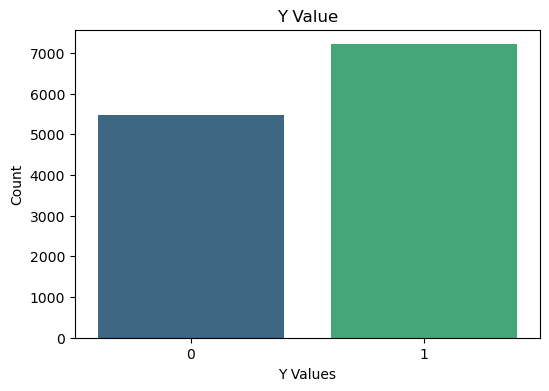

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(x=y.index, y=y, palette="viridis")
plt.title('Y Value')
plt.xlabel('Y Values')
plt.ylabel('Count')

# Show the chart
plt.show()

### Checking for Null values

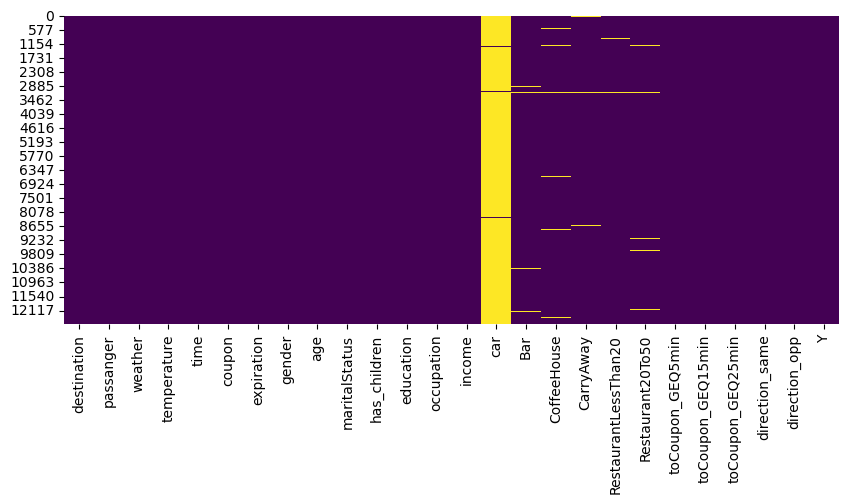

In [9]:
plt.figure(figsize=(10, 4))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [10]:
null_columns = data.columns[data.isnull().any()]
print("Columns with null values:")
print(data[null_columns].isnull().sum())

Columns with null values:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


<Axes: >

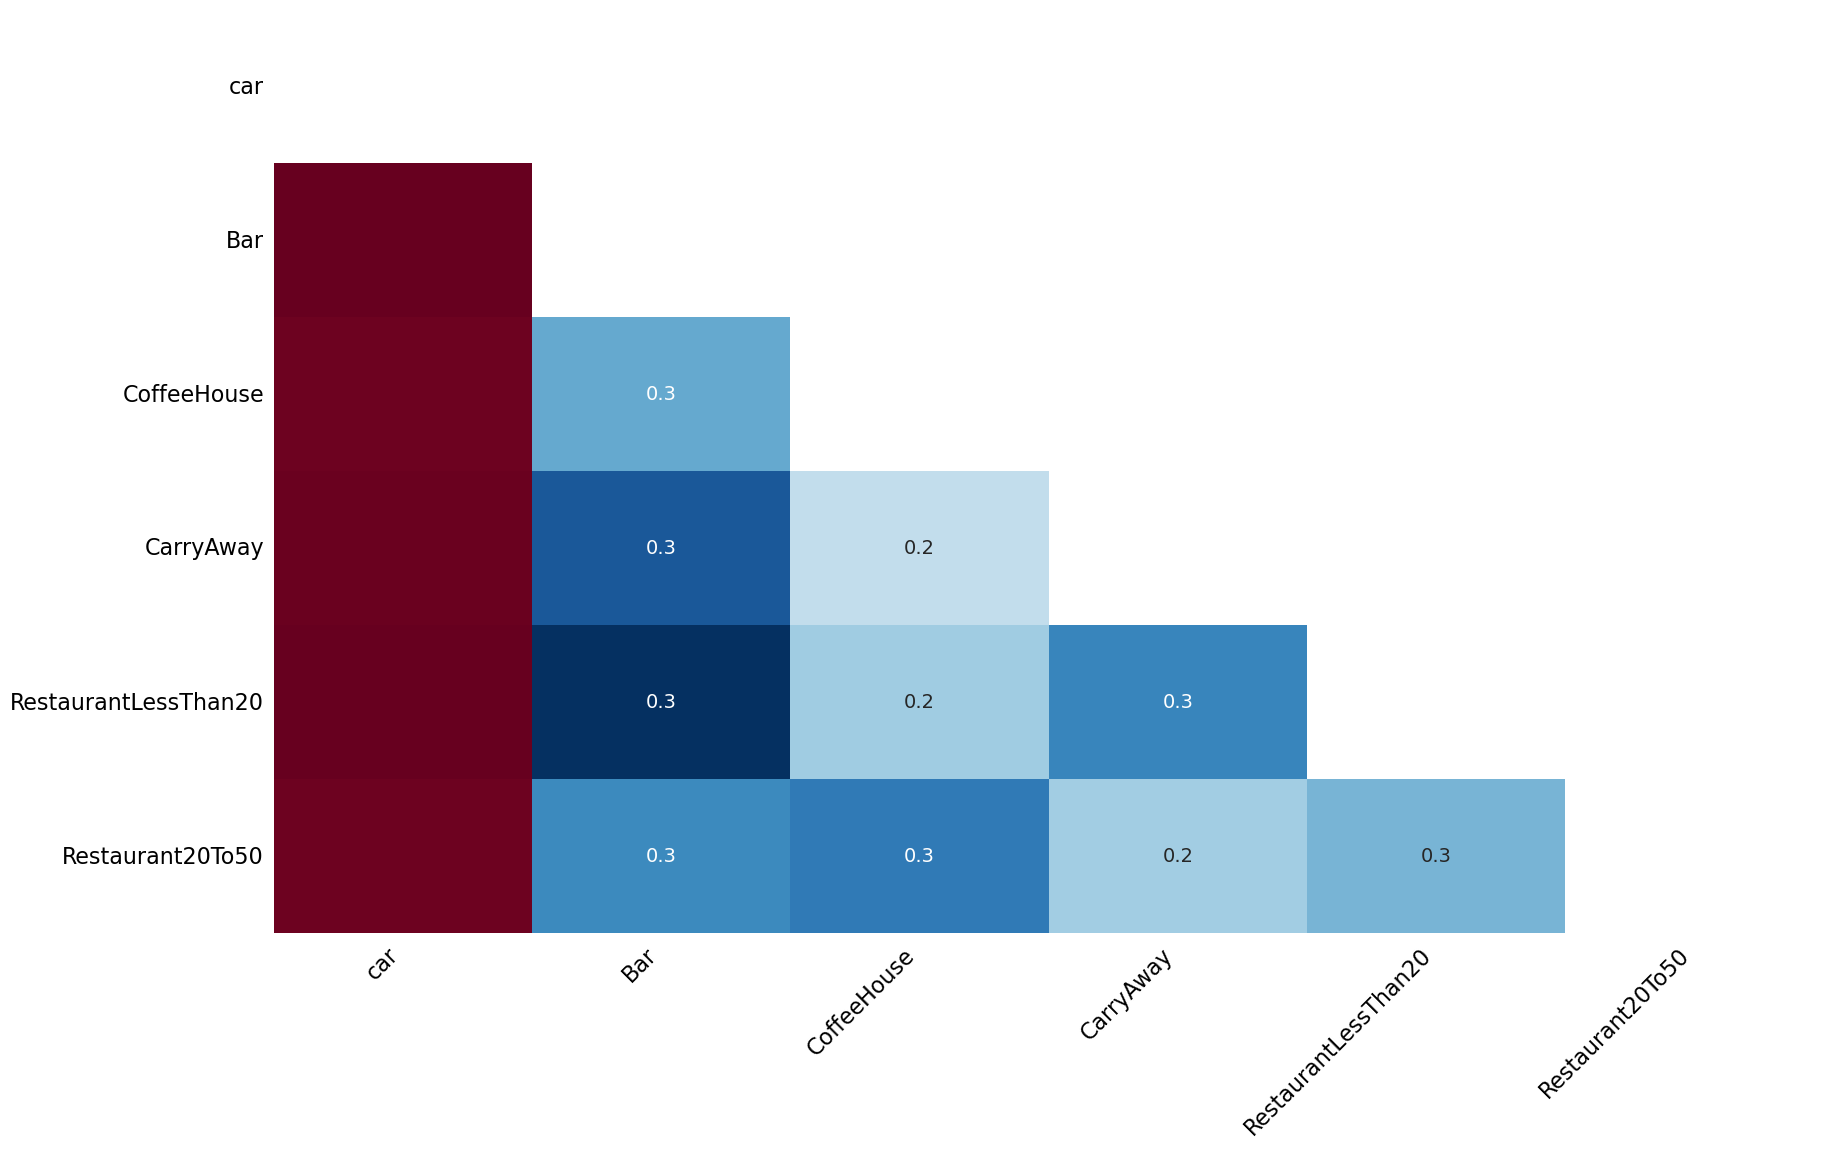

In [11]:
msno.heatmap(data)

* We can see that the missing values are missing at random
* Since ***Car*** has majority null values, we will drop it.

In [12]:
data.drop('car', axis=1, inplace=True)

#### Using weighted random imputation to replace missing values

In [13]:
columns_with_missing = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in columns_with_missing:
    probabilities = data[column].value_counts(normalize=True).to_dict()

    data[column].fillna(np.random.choice(data[column].dropna().unique(), p=list(probabilities.values())), inplace=True)

In [14]:
null_columns = data.columns[data.isnull().any()]
print("Columns with null values:")
print(data[null_columns].isnull().sum())

Columns with null values:
Series([], dtype: float64)


### Checking the affect of Weather, temperature and time of the day on Coupon Acceptance/

In [15]:
weath_time_vars = ['weather','temperature','time']

In [16]:
for var in weath_time_vars:
    print(f'{var}: {data[var].unique()}')


weather: ['Sunny' 'Rainy' 'Snowy']
temperature: [55 80 30]
time: ['2PM' '10AM' '6PM' '7AM' '10PM']


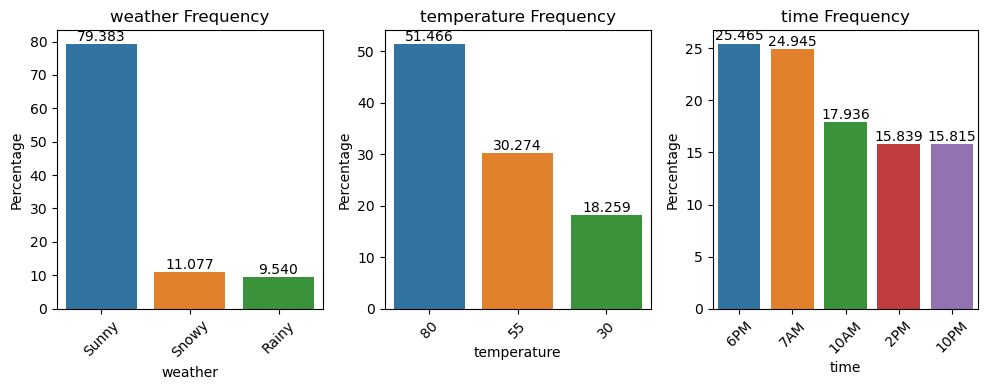

In [17]:
num_variables = len(weath_time_vars)
num_rows = (num_variables - 1) // 3 + 1
num_cols = min(num_variables, 3)


fig, axes = plt.subplots(num_rows, num_cols,figsize=(10, 4))


axes = axes.flatten()

# Iterate over the frequency variables and subplot axes
for var, ax in zip(weath_time_vars, axes):
    val_counts = data[var].value_counts()
    labels = val_counts.index
    counts = val_counts.values

    percentages = (counts / counts.sum()) * 100

    sns.barplot(x=labels, y=percentages, ax=ax, order=labels)
    ax.set_title(f"{var} Frequency")
    ax.set_ylabel("Percentage")
    ax.set_xticklabels(labels, rotation=45)

    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height+ 0.01, f'{height:0.3f}',ha = 'center', va = 'bottom')

# Hide empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


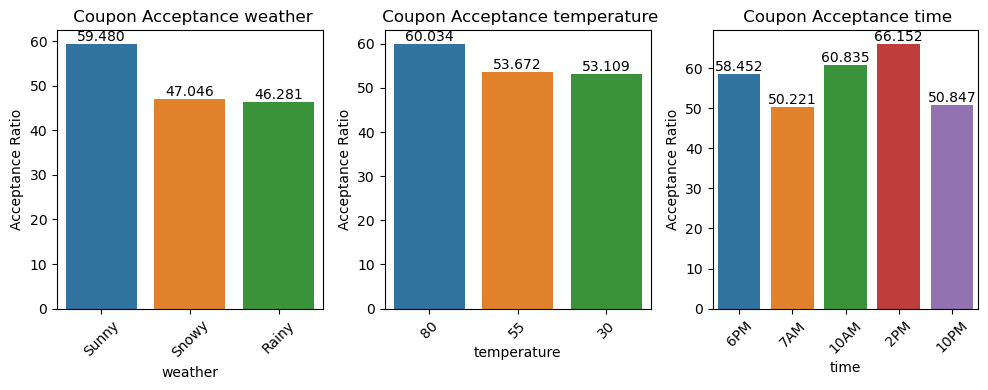

In [18]:
fig, axes = plt.subplots(num_rows, num_cols,figsize=(10, 4))

axes = axes.flatten()

for var, ax in zip(weath_time_vars, axes):
    val_counts = data[var].value_counts()
    labels = val_counts.index
    coupon_accept = data.loc[data['Y']==1, var].value_counts()
    coupon_accept_ratio = (coupon_accept/val_counts)*100
    coupon_accept_ratio = coupon_accept_ratio.reindex(labels)
    

    sns.barplot(x=labels, y=coupon_accept_ratio, ax=ax, order = labels)
    ax.set_title(f" Coupon Acceptance {var}")
    ax.set_ylabel("Acceptance Ratio")
    ax.set_xticklabels(labels, rotation=45)

    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height+ 0.01, f'{height:0.3f}',ha = 'center', va = 'bottom')

# Hide empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [19]:
for var in weath_time_vars:
    chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data[var], data['Y']))
    alpha = 0.05  
    correlation_status = 'Correlated' if p < alpha else 'Not Correlated'
    print(f"{var} - {'Y'}: {correlation_status}, p-value = {p}")


weather - Y: Correlated, p-value = 8.312207740720093e-31
temperature - Y: Correlated, p-value = 6.92683621224045e-13
time - Y: Correlated, p-value = 8.37562170116935e-37


* The chi-square test returns a p-value of less than the significance value of 0.05 for all three variables
* This means that these are statistically significant relationships.

* The coupon acceptance probability is the highest at temperature of 80
* For temperatures of 55 and 30, the acceptance probabilities are almost equal.

* The probabilities show that chances of coupon acceptance at 6 pm, 10 pm and 2 pm as compared to other times.

In [20]:
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data['temperature'], data['weather']))
alpha = 0.05  
correlation_status = 'Correlated' if p < alpha else 'Not Correlated'
print(f"{var} - {'Y'}: {correlation_status}, p-value = {p}")


time - Y: Correlated, p-value = 0.0


* We will consider only the weather variable as these are correlated.

In [21]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

### Checking the impact of coupon attributes Coupon Acceptance

In [22]:
coupon_attributes = ['coupon','expiration']

In [23]:
for var in coupon_attributes:
    print(f'{Style.BRIGHT}{var}{Style.RESET_ALL}: {data[var].unique()}')


coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: ['1d' '2h']


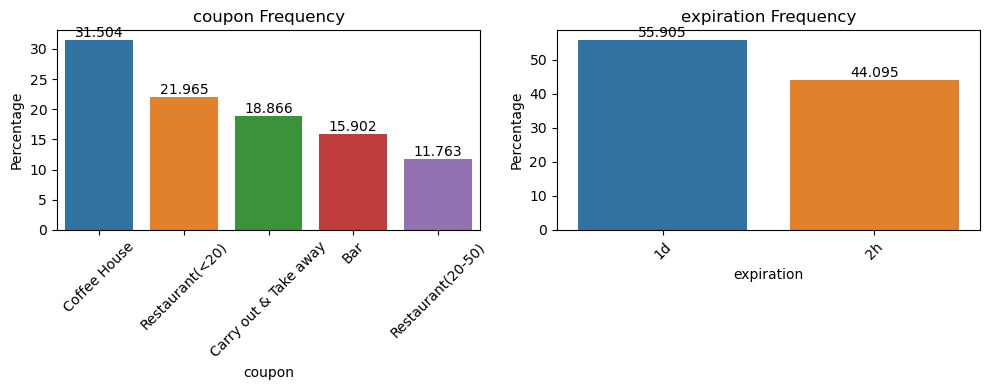

In [24]:
num_variables = len(coupon_attributes)
num_rows = (num_variables - 1) // 3 + 1
num_cols = min(num_variables, 3)


fig, axes = plt.subplots(num_rows, num_cols,figsize=(10, 4))


axes = axes.flatten()

# Iterate over the frequency variables and subplot axes
for var, ax in zip(coupon_attributes, axes):
    val_counts = data[var].value_counts()
    labels = val_counts.index
    counts = val_counts.values

    percentages = (counts / counts.sum()) * 100

    sns.barplot(x=labels, y=percentages, ax=ax, order=labels)
    ax.set_title(f"{var} Frequency")
    ax.set_ylabel("Percentage")
    ax.set_xticklabels(labels, rotation=45)

    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height+ 0.01, f'{height:0.3f}',ha = 'center', va = 'bottom')

# Hide empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


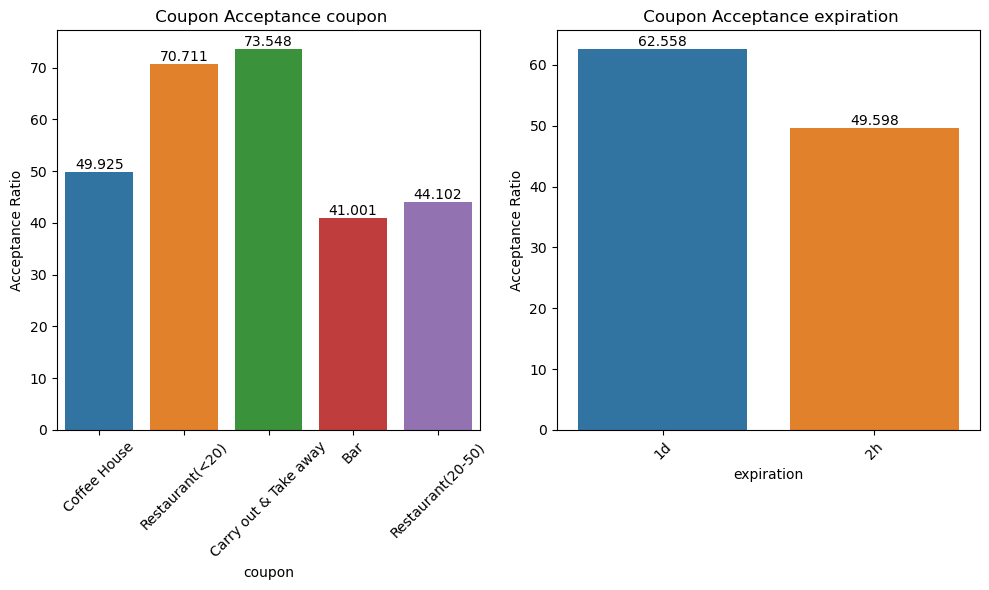

In [25]:
fig, axes = plt.subplots(num_rows, num_cols,figsize=(10, 6))

axes = axes.flatten()

for var, ax in zip(coupon_attributes, axes):
    val_counts = data[var].value_counts()
    labels = val_counts.index
    coupon_accept = data.loc[data['Y']==1, var].value_counts()
    coupon_accept_ratio = (coupon_accept/val_counts)*100
    coupon_accept_ratio = coupon_accept_ratio.reindex(labels)
    

    sns.barplot(x=labels, y=coupon_accept_ratio, ax=ax, order = labels)
    ax.set_title(f" Coupon Acceptance {var}")
    ax.set_ylabel("Acceptance Ratio")
    ax.set_xticklabels(labels, rotation=45)

    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height+ 0.01, f'{height:0.3f}',ha = 'center', va = 'bottom')

# Hide empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [26]:
for var in coupon_attributes:
    chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data[var], data['Y']))
    alpha = 0.05  
    correlation_status = 'Correlated' if p < alpha else 'Not Correlated'
    print(f"{var} - {'Y'}: {correlation_status}, p-value = {p}")

coupon - Y: Correlated, p-value = 8.575341747082738e-188
expiration - Y: Correlated, p-value = 2.2875426931245946e-48


* The chi-square test returns a p-value of less than the significance value of 0.05 for both features
* This means that these are statistically significant relationships

* The probability of acceptance indicates that the restaurant (less than 20) and carry-out & take-away coupons have the highest likelihood, approximately 70%. 


### Effect of destination features and passenger type on Coupon Acceptance

In [27]:
destination_attributes = ['destination','passanger','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp']

In [28]:
for feature in destination_attributes:
    print(f'{feature}:{data[feature].unique()}')

destination:['No Urgent Place' 'Home' 'Work']
passanger:['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
toCoupon_GEQ5min:[1]
toCoupon_GEQ15min:[0 1]
toCoupon_GEQ25min:[0 1]
direction_same:[0 1]
direction_opp:[1 0]


* We see that ***toCoupon_GEQ5min*** has only one value so we won't consider that

In [29]:
data[['direction_opp','direction_same']].head()

,direction_opp,direction_same
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


* These two variables convey the same information. So we will only check the correlation of one of them

* We will not check the effect of ***direction_same*** and ***toCoupon_GEQ5min***

In [30]:
destination_attributes = [attr for attr in destination_attributes if attr not in ['direction_same', 'toCoupon_GEQ5min']]

In [31]:
destination_attributes

['destination',
 'passanger',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_opp']

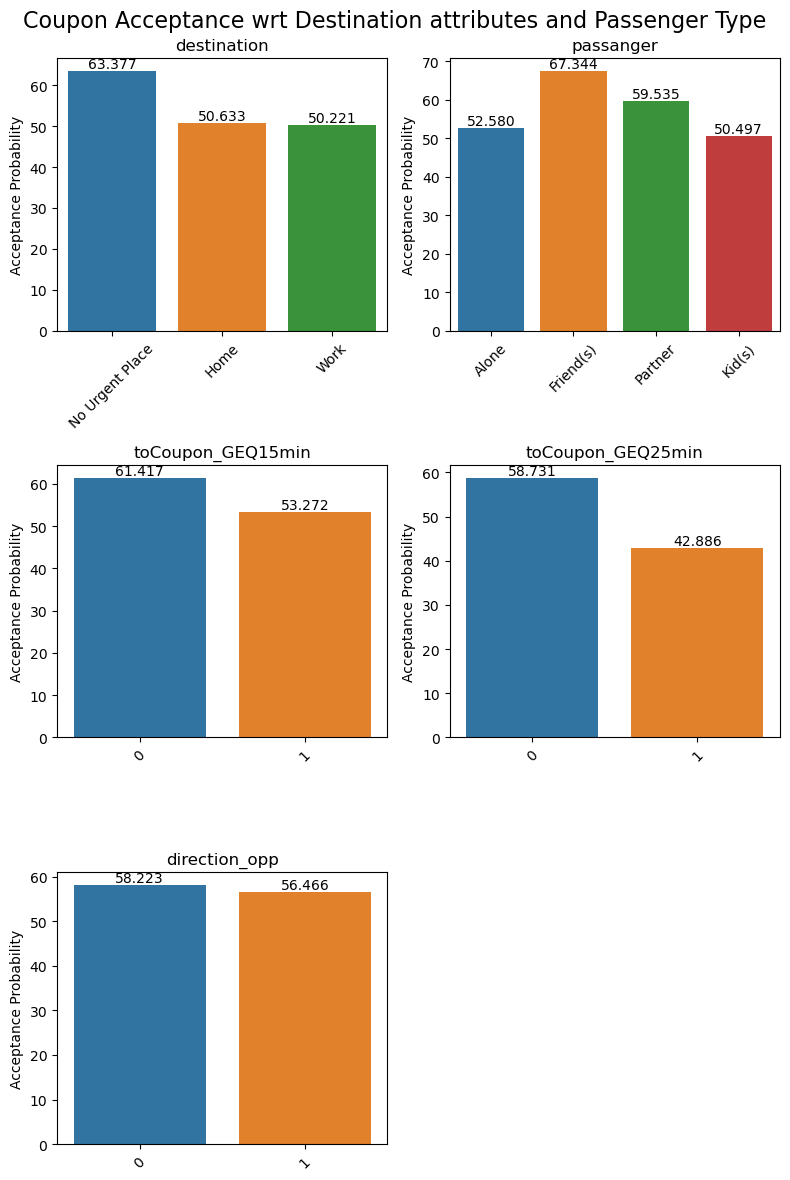

In [32]:
num_variables = len(destination_attributes)
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12))  # Adjust figsize as needed

fig.suptitle("Coupon Acceptance wrt Destination attributes and Passenger Type", fontsize=16)

for i, attribute in enumerate(destination_attributes):
    row, col = divmod(i, num_cols)  # Corrected calculation for row and column index
    ax = axes[row, col]

    value_counts = data[attribute].value_counts()
    labels = value_counts.index
    coupon_accept_wrt_attribute = data.loc[data['Y'] == 1, attribute].value_counts()

    coupon_accept_ratio_wrt_attribute = coupon_accept_wrt_attribute / value_counts * 100

    # Use Seaborn for plotting
    sns.barplot(x=labels, y=coupon_accept_ratio_wrt_attribute, ax=ax)
    ax.set_title(f"{attribute}")
    ax.set_xlabel('')
    ax.set_ylabel("Acceptance Probability")

    # Annotate the bar chart with values
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height+0.01, f'{height:0.3f}', ha='center', va='bottom')

    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
for attribute in destination_attributes:
    chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data[attribute], data['Y']))

    alpha = 0.05  
    correlation_status = 'Correlated' if p < alpha else 'Not Correlated'
    print(f"{attribute} - {'Y'}: {correlation_status}, p-value = {p}")

destination - Y: Correlated, p-value = 8.40265678045787e-48
passanger - Y: Correlated, p-value = 7.284119805592145e-48
toCoupon_GEQ15min - Y: Correlated, p-value = 4.6359722947672643e-20
toCoupon_GEQ25min - Y: Correlated, p-value = 2.4662838393790205e-31
direction_opp - Y: Not Correlated, p-value = 0.10541990881286277


* Since the p-value is greater than 0.05, we can conclude that the relationship between coupon acceptance and direction is not statistically significant.

* The probability of acceptance indicates that when the destination type is ***No Urgent Place***, the coupon acceptance probability is the highest, around 63%. 


### Checking the effect of human attributes on Coupon Acceptance

In [34]:
human_attributes = ['gender','age','maritalStatus','has_children']

In [35]:
for attribute in human_attributes:
    print(f'{attribute}:{data[attribute].unique()}')

gender:['Female' 'Male']
age:['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus:['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children:[1 0]


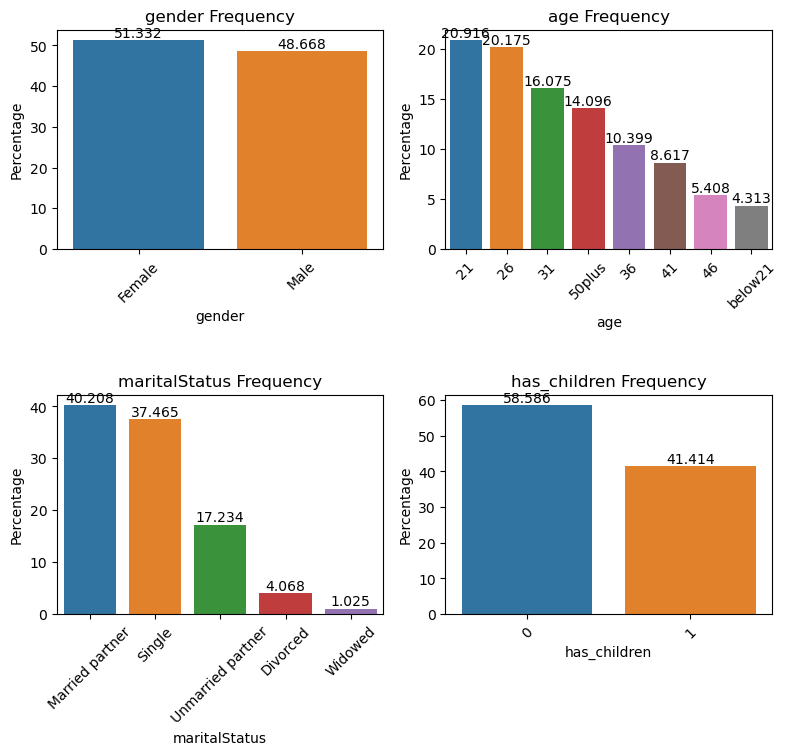

In [36]:
num_variables = len(human_attributes)
num_rows = 3
num_cols = 2


fig, axes = plt.subplots(num_rows, num_cols,figsize=(8, 10))


axes = axes.flatten()

# Iterate over the frequency variables and subplot axes
for var, ax in zip(human_attributes, axes):
    val_counts = data[var].value_counts()
    labels = val_counts.index
    counts = val_counts.values

    percentages = (counts / counts.sum()) * 100

    sns.barplot(x=labels, y=percentages, ax=ax, order=labels)
    ax.set_title(f"{var} Frequency")
    ax.set_ylabel("Percentage")
    ax.set_xticklabels(labels, rotation=45)

    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height+ 0.01, f'{height:0.3f}',ha = 'center', va = 'bottom')

# Hide empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

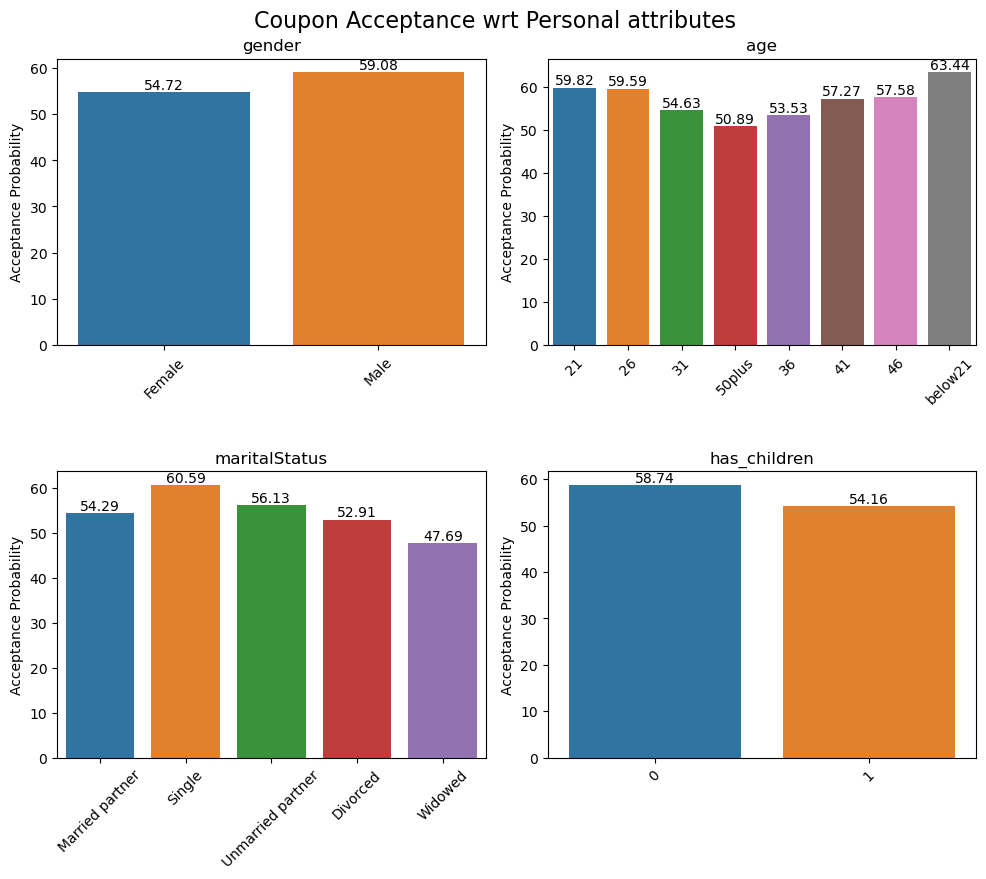

In [37]:
num_variables = len(human_attributes)
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))  # Adjust figsize as needed

fig.suptitle("Coupon Acceptance wrt Personal attributes", fontsize=16)

for i, attribute in enumerate(human_attributes):
    row, col = divmod(i, num_cols)  # Corrected calculation for row and column index
    ax = axes[row, col]

    value_counts = data[attribute].value_counts()
    labels = value_counts.index
    coupon_accept_wrt_attribute = data.loc[data['Y'] == 1, attribute].value_counts()

    coupon_accept_ratio_wrt_attribute = coupon_accept_wrt_attribute / value_counts * 100
    coupon_accept_ratio_wrt_attribute = coupon_accept_ratio_wrt_attribute.reindex(labels)

    # Use Seaborn for plotting
    sns.barplot(x=labels, y=coupon_accept_ratio_wrt_attribute, ax=ax)
    ax.set_title(f"{attribute}")
    ax.set_xlabel('')
    ax.set_ylabel("Acceptance Probability")

    # Annotate the bar chart with values
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height+0.01, f'{height:0.2f}', ha='center', va='bottom')

    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
for attribute in human_attributes:
    chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data[attribute], data['Y']))

    alpha = 0.05  
    correlation_status = 'Correlated' if p < alpha else 'Not Correlated'
    print(f"{attribute} - {'Y'}: {correlation_status}, p-value = {p}")

gender - Y: Correlated, p-value = 8.05552865589407e-07
age - Y: Correlated, p-value = 3.5221422366296096e-11
maritalStatus - Y: Correlated, p-value = 6.489647983232487e-10
has_children - Y: Correlated, p-value = 3.1775773676508616e-07


### Effect of income, education and Occupation on Coupon Acceptance

In [39]:
variables = ['income','education','occupation']

In [40]:
for var in variables:
    print(f'{var}:{data[var].unique()}')

income:['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
education:['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation:['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fis

In [41]:
# Create dropdown widget for variable selection
variable_dropdown = widgets.Dropdown(options=variables, description='Select Variable:')

# Define function to update plot based on selected variable
def update_plot(selected_variable):
    val_counts = data[selected_variable].value_counts()
    percentages = (val_counts / val_counts.sum()) * 100

    fig = px.bar(
        x=percentages.values,
        y=val_counts.index,
        orientation='h',
        text=percentages.values.round(2),
        labels={'x': 'Percentage', 'y': selected_variable},
        title=f'{selected_variable} Frequency'
    )
    

    fig.update_layout(showlegend=False)
    fig.show()

# Connect the dropdown widget to the update function
widgets.interactive(update_plot, selected_variable=variable_dropdown)



interactive(children=(Dropdown(description='Select Variable:', options=('income', 'education', 'occupation'), …

In [50]:
# Create dropdown widget for variable selection
variable_dropdown = widgets.Dropdown(options=variables, description='Select Variable:')

# Define function to update plot based on selected variable
def update_plot(selected_variable):
    val_counts = data[selected_variable].value_counts()
    labels = val_counts.index
    coupon_accept_wrt_variable = data.loc[data['Y']==1, selected_variable].value_counts()
    coupon_accept_ratio_wrt_variable = (coupon_accept_wrt_variable/val_counts)*100
    coupon_accept_ratio_wrt_variable = coupon_accept_ratio_wrt_variable.reindex(labels)
    
    

    fig = px.bar(
        x=coupon_accept_ratio_wrt_variable,
        y=val_counts.index,
        orientation='h',
        text=coupon_accept_ratio_wrt_variable.values.round(2),
        labels={'x': 'Acceptance ratio', 'y': selected_variable},
        title=f'{selected_variable} Acceptance Ratio'
    )
    

    fig.update_layout(showlegend=False)
    fig.show()

# Connect the dropdown widget to the update function
widgets.interactive(update_plot, selected_variable=variable_dropdown)



interactive(children=(Dropdown(description='Select Variable:', options=('income', 'education', 'occupation'), …

In [43]:
for var in variables:
    
    chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data[var], data['Y']))

    alpha = 0.05  
    correlation_status = 'Correlated' if p < alpha else 'Not Correlated'
    print(f"{var} - {'Y'}: {correlation_status}, p-value = {p}")

income - Y: Correlated, p-value = 4.30446851198096e-08
education - Y: Correlated, p-value = 6.858463266342188e-08
occupation - Y: Correlated, p-value = 1.0136827151270322e-14


### Effect of frequency variables on Coupon Acceptance


In [44]:
frequency_variables = ['Bar','CoffeeHouse', 'CarryAway','RestaurantLessThan20','Restaurant20To50']

In [45]:
for var in frequency_variables:
    print(var, data[var].unique())

Bar ['never' 'less1' '1~3' 'gt8' '4~8']
CoffeeHouse ['never' 'less1' '4~8' '1~3' 'gt8']
CarryAway ['4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20 ['4~8' '1~3' 'less1' 'gt8' 'never']
Restaurant20To50 ['1~3' 'less1' 'never' 'gt8' '4~8']


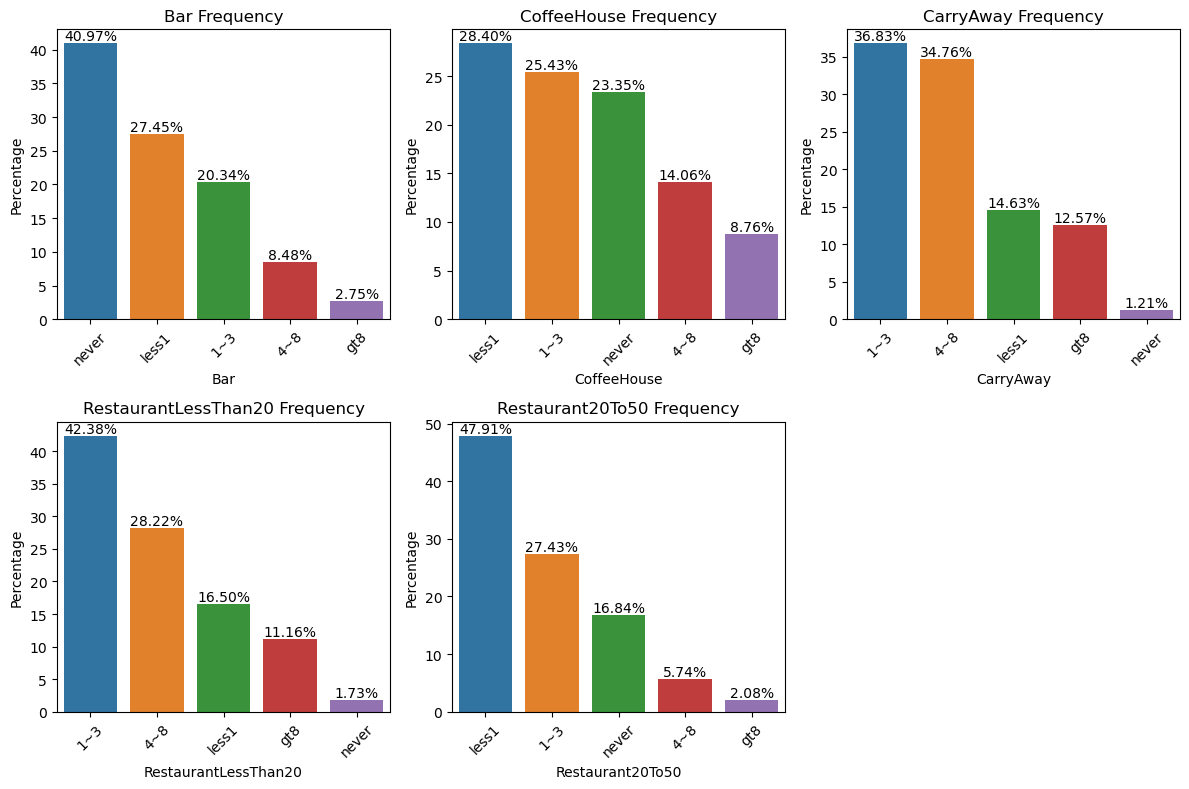

In [46]:
num_variables = len(frequency_variables)
num_rows = (num_variables - 1) // 3 + 1
num_cols = min(num_variables, 3)

# Create subplots with the specified grid arrangement
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the frequency variables and subplot axes
for var, ax in zip(frequency_variables, axes):
    val_counts = data[var].value_counts()
    labels = val_counts.index
    counts = val_counts.values

    percentages = (counts / counts.sum()) * 100

    sns.barplot(x=labels, y=percentages, ax=ax)
    ax.set_title(f"{var} Frequency")
    ax.set_ylabel("Percentage")
    ax.set_xticklabels(labels, rotation=45)

    for i, count in enumerate(counts):
        ax.text(i, percentages[i], f"{percentages[i]:.2f}%", ha='center', va='bottom')

# Hide empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

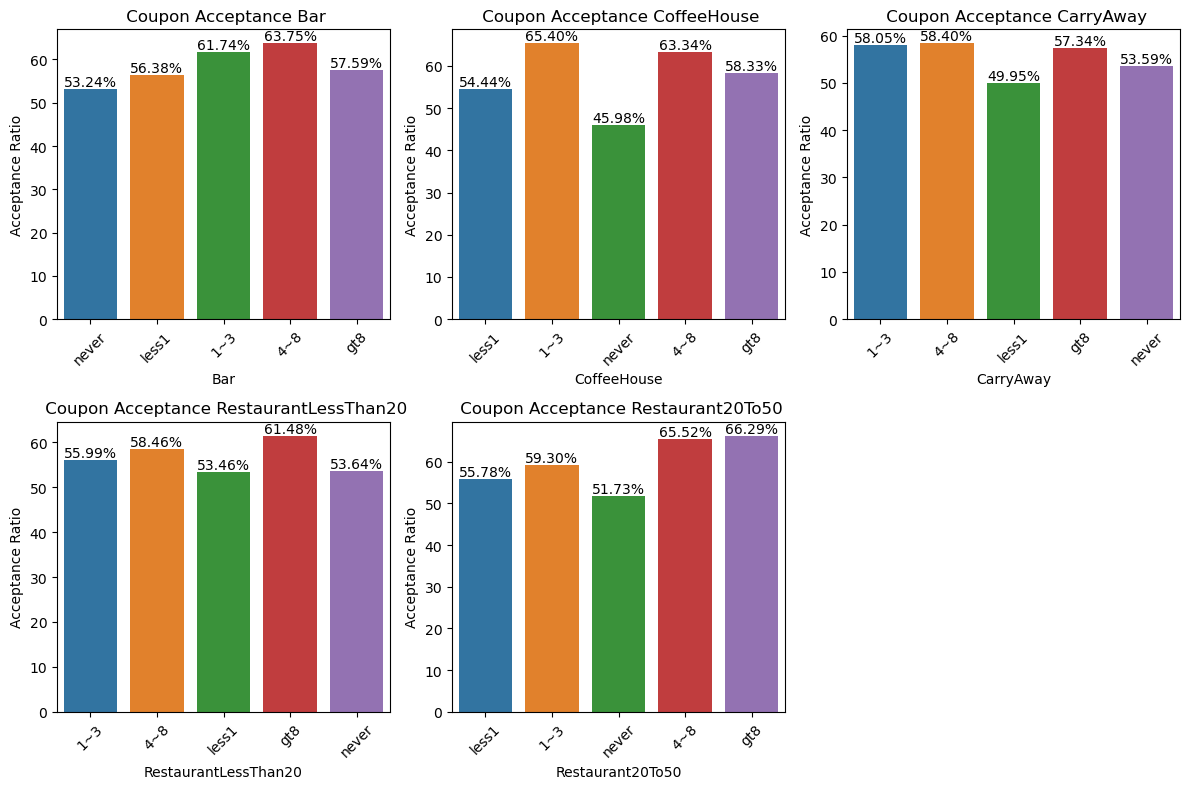

In [47]:
num_variables = len(frequency_variables)
num_rows = (num_variables - 1) // 3 + 1
num_cols = min(num_variables, 3)

# Create subplots with the specified grid arrangement
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

for var, ax in zip(frequency_variables, axes):
    val_counts = data[var].value_counts()
    labels = val_counts.index
    coupon_accept = data.loc[data['Y']==1, var].value_counts()
    coupon_accept_ratio = (coupon_accept/val_counts)*100
    coupon_accept_ratio = coupon_accept_ratio.reindex(labels)
    

    sns.barplot(x=labels, y=coupon_accept_ratio, ax=ax)
    ax.set_title(f" Coupon Acceptance {var}")
    ax.set_ylabel("Acceptance Ratio")
    ax.set_xticklabels(labels, rotation=45)

    for i, coupon_accept_ratio in enumerate(coupon_accept_ratio):
        ax.text(i, coupon_accept_ratio, f"{coupon_accept_ratio:.2f}%", ha='center', va='bottom')

# Hide empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [48]:
for var in frequency_variables:
    chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data[var], data['Y']))
    alpha = 0.05  
    correlation_status = 'Correlated' if p < alpha else 'Not Correlated'
    print(f"{var} - {'Y'}: {correlation_status}, p-value = {p}")

Bar - Y: Correlated, p-value = 3.1284054427545614e-15
CoffeeHouse - Y: Correlated, p-value = 4.171544970829023e-59
CarryAway - Y: Correlated, p-value = 6.581094087949561e-09
RestaurantLessThan20 - Y: Correlated, p-value = 9.79610840018437e-06
Restaurant20To50 - Y: Correlated, p-value = 1.5643485470254757e-13


In [49]:
# encoder = ce.TargetEncoder(cols=nominal_vars, smoothing=0.2)  # You can adjust the smoothing parameter

# X_train_target_encoded = encoder.fit_transform(X_train, y_train)

# X_test_target_encoded = encoder.transform(X_test)

# X_test_target_encoded.fillna(X_train_target_encoded.mean(), inplace=True)  # You can use other imputation strategies


# # X_train_target_encoded = pd.concat([X_train.drop(columns=nominal_vars), X_train_target_encoded], axis=1)
# # X_test_target_encoded = pd.concat([X_test.drop(columns=nominal_vars), X_test_target_encoded], axis=1)